## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.set_index('Mouse ID')
clean_df = clean_df.drop('g989', axis=0)
clean_df.reset_index(inplace=True)

In [68]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each
#drug regimen: 
mean = clean_df.groupby(['Drug Regimen']).mean()
tvol_mean = mean['Tumor Volume (mm3)']
median = clean_df.groupby(['Drug Regimen']).median()
tvol_median = median['Tumor Volume (mm3)']
var = clean_df.groupby(['Drug Regimen']).var()
tvol_var = var['Tumor Volume (mm3)']
std = clean_df.groupby(['Drug Regimen']).std()
tvol_std = std['Tumor Volume (mm3)']
sem = clean_df.groupby(['Drug Regimen']).sem()
tvol_sem = sem['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stat_tvol_df = pd.DataFrame( 
    { 
    'Tumor Volume Mean': tvol_mean,
    'Tumor Volume Median': tvol_median,
    'Tumor Volume Variance': tvol_var,
    'Tumor Volume St. Dev.': tvol_std,
    'Tumor Volume SEM': tvol_sem } 
)
summary_stat_tvol_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements')

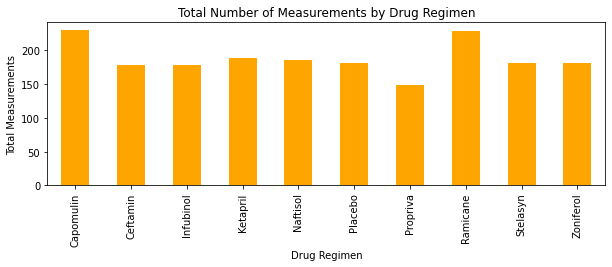

In [77]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tot_measurements = clean_df.groupby('Drug Regimen').count()
tot_measurements.rename(columns= {'Tumor Volume (mm3)': 'Total Measurements'}, inplace=True)
measurement_bar = tot_measurements['Total Measurements']
measurement_bar = measurement_bar.plot(kind='bar', figsize=(10,3), facecolor='orange', title='Total Number of Measurements by Drug Regimen')
measurement_bar.set_ylabel('Total Measurements')


In [79]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(measurement_bar))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, measurement_bar, color="b", width=.5)
plt.xticks(tick_locations, measurement_bar.index.values, rotation=15)
plt.show()

TypeError: object of type 'AxesSubplot' has no len()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
